In [47]:
import numpy as np
import math
import scipy.stats
from sklearn.metrics import roc_curve, auc
# makes printing more human-friendly
np.set_printoptions(precision=3,suppress=True)

In [3]:
# Prior probabilities
P_pro = 0.1
P_amateur = 0.9

# Parameters for normal distribution
mean_pro = 2.5
std_dev_pro = 0.2
mean_amateur = 4
std_dev_amateur = 0.5

### Question 1a

In [10]:
def normal_distribution(x, mean, std_dev):
    """
    Compute the probability density function for the normal distribution.
    """
    p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    return p

t = np.array([2.5, 3., 3.5])
print('P(t|pro) \t', normal_distribution(t, mean_pro, std_dev_pro))
print('P(t|amateur) \t', normal_distribution(t, mean_amateur, std_dev_amateur))

P(t|pro) 	 [1.995 0.088 0.   ]
P(t|amateur) 	 [0.009 0.108 0.484]


### Question 1b

In [13]:
def posterior_probability(time):
    """
    Compute the posterior probability of a runner being a 'pro' or 'amateur' given their marathon time.
    """
    # Calculate likelihoods
    L_pro = normal_distribution(time, mean_pro, std_dev_pro)
    L_amateur = normal_distribution(time, mean_amateur, std_dev_amateur)

    P_time = L_pro * P_pro + L_amateur * P_amateur
    
    # Calculate posteriors
    P_pro_given_time = (L_pro * P_pro) / P_time                    # P(pro|time)
    P_amateur_given_time = (L_amateur * P_amateur) / P_time        # P(amateur|time)

    return P_pro_given_time, P_amateur_given_time

P_pro_given_time, P_amateur_given_time = posterior_probability(t)
print('P(pro|t) \t', P_pro_given_time)
print('P(amateur|t) \t', P_amateur_given_time)

P(pro|t) 	 [0.962 0.083 0.   ]
P(amateur|t) 	 [0.038 0.917 1.   ]


### Question 1c

In [15]:
def classify_runner(time):
    """
    Classify a runner as 'pro' or 'amateur' based on their marathon time using MAP.
    """
    # Calculate posteriors
    P_pro_given_time, P_amateur_given_time = posterior_probability(time)
    
    # Classify based on the highest posterior
    preds = []
    for i, t in enumerate(time):
        decision = "pro" if P_pro_given_time[i] > P_amateur_given_time[i] else "amateur"  # assign 'pro' or 'amateur' according to MAP rule
        preds.append(decision)
    return preds

# Test the function
print('P(pro|t) \t', classify_runner(t))

P(pro|t) 	 ['pro', 'amateur', 'amateur']


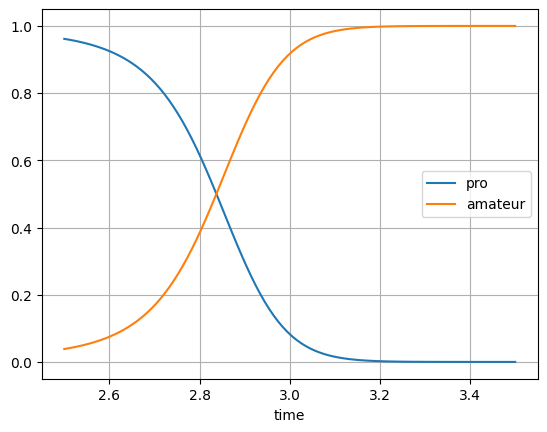

In [16]:
from matplotlib import pyplot as plt
t = np.linspace(2.5, 3.5, 100)  # 100 times between 2.5 and 3.5
P_pro_given_time, P_amateur_given_time = posterior_probability(t)

plt.plot(t, P_pro_given_time, label='pro')
plt.plot(t, P_amateur_given_time, label='amateur')
plt.xlabel('time')
plt.grid('on')
plt.legend()
plt.show()

### Question 1d

In [37]:
def sample_amateur_times(n):
    return np.random.randn(n)*std_dev_amateur+mean_amateur

def sample_pro_times(n):
    return np.random.randn(n)*std_dev_pro+mean_pro

n = 1000
amateur_times = sample_amateur_times(n)
decisions = classify_runner(amateur_times)
P_miss_cls = decisions.count('pro') / len(decisions)
print('Prob Misclassifying Amateurs', P_miss_cls)

pro_times = sample_pro_times(n)
decisions = classify_runner(pro_times)
P_miss_cls = decisions.count('amateur') / len(decisions)
print('Prob Misclassifying Pros', P_miss_cls)

Prob Misclassifying Amateurs 0.017
Prob Misclassifying Pros 0.052


### Question 2a

In [38]:
num_spam_results = 19
num_spam_results

19

### Question 2b

In [39]:
P_TPR = 15 / (15 + 5)
P_TPR

0.75

### Question 2c

In [42]:
P_FPR = 4 / (4 + 16)
P_FPR

0.2

### Question 3a

b = 0.3  
| Index (k)        | **1**  | **2**  | **3**  | **4**  | **5**  | **6**  | **7**  | **8**  | **9**  | **10**  |
|------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $ P(y(k) = 1 | x(k)) $ | **0.05** | **0.15** | **0.40** | **0.55** | **0.25** | **0.45** | **0.48** | **0.62** | **0.67** | **0.75** |
| True Label       | **0**  | **0**  | **0**  | **0**  | **1**  | **1**  | **1**  | **1**  | **1**  | **1**  |
| **Predicted Label (b=0.3)** | **0**  | **0**  | **1**  | **1**  | **0**  | **1**  | **1**  | **1**  | **1**  | **1**  |

### Question 3b


$
C = \begin{bmatrix} 
TP & FN \\ 
FP & TN 
\end{bmatrix}
$

From the table:

- **TP:** 5 (indices: 6, 7, 8, 9, 10)
- **FP:** 2 (indices: 3, 4)
- **TN:** 2 (indices: 1, 2)
- **FN:** 1 (index: 5)

Thus, the confusion matrix:

$
C = \begin{bmatrix} 5 & 1 \\ 2 & 2 \end{bmatrix}
$


### Question 3c

1. **Sensitivity:**  
   $
   \text{TPR} = \frac{TP}{TP + FN} = \frac{5}{5 + 1} = \frac{5}{6} \approx 0.8333
   $

2. **Specificity:**  
   $
   \text{TNR} = \frac{TN}{TN + FP} = \frac{2}{2 + 2} = \frac{2}{4} = 0.5
   $

3. **False Alarm:**  
   $
   \text{FPR} = \frac{FP}{FP + TN} = \frac{2}{2 + 2} = \frac{2}{4} = 0.5
   $

4. **Miss:**  
   $
   \text{FNR} = \frac{FN}{TP + FN} = \frac{1}{1 + 5} = \frac{1}{6} = \approx 0.167
   $

5. **Precision:**  
   $
   \text{Precision} = \frac{TP}{TP + FP} = \frac{5}{5 + 2} = \frac{5}{7} \approx 0.714
   $

6. **Recall:**  
   $
   \text{Recall} = \frac{TP}{TP + FN} = \frac{5}{5 + 1} = \frac{5}{6} \approx 0.8333
   $
   
6. **Accuracy:**  
   $
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{5 + 2}{10} = \frac{7}{10} = 0.7
   $


### Question 3d

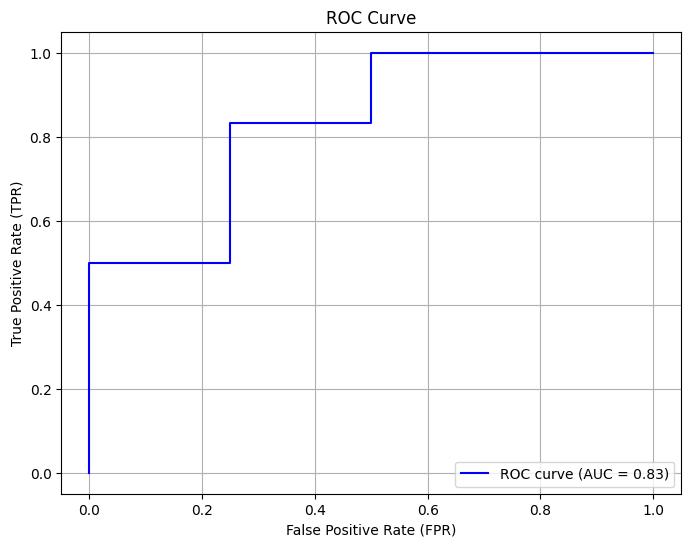

Area Under the Curve (AUC): 0.8333


In [60]:
P_y_given_x = [0.05, 0.15, 0.40, 0.55, 0.25, 0.45, 0.48, 0.62, 0.67, 0.75]
true_labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

def calculate_tpr_fpr(P_y_given_x, true_labels, threshold):
    # y(k) = 0 if P (y(k) = 1|x(k)) ≤ b;
    predicted_labels = [1 if p > threshold else 0 for p in P_y_given_x]
    
    TP = sum((pred == 1) and (true == 1) for pred, true in zip(predicted_labels, true_labels))
    FP = sum((pred == 1) and (true == 0) for pred, true in zip(predicted_labels, true_labels))
    TN = sum((pred == 0) and (true == 0) for pred, true in zip(predicted_labels, true_labels))
    FN = sum((pred == 0) and (true == 1) for pred, true in zip(predicted_labels, true_labels))
    
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    
    return TPR, FPR

thresholds = np.linspace(0, 1, 1000)
tpr_values = []
fpr_values = []

for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(P_y_given_x, true_labels, threshold)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, color='b', label='ROC curve (AUC = {:.2f})'.format(auc(fpr_values, tpr_values)))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc = auc(fpr_values, tpr_values)
print(f"Area Under the Curve (AUC): {roc_auc.round(4)}")